In [1]:
import atoti as tt

In [2]:
session = tt.Session.start(
    tt.SessionConfig(
        port=9090,
        java_options=[
            "-Dspring.profiles.active=application-monitoring",
            "-Djson.log.dir=logs",
            "-Dotel.java.global-autoconfigure.enabled=true",
            "-Dotel.traces.exporter=otlp",
            "-Dotel.metrics.exporter=otlp",
            "-Dotel.logs.exporter=otlp",
            "-Dotel.exporter.otlp.endpoint=http://localhost:4318",
            "-Dotel.traces.sampler=always_on",
            "-Dotel.metric.export.interval=1000",
            "-Dotel.resource.attributes=service.name=atoti-spring-boot,service.version=1.0",
        ]
    )
)

In [3]:
session.logs_path

PosixPath('/Users/aya/.atoti/1732124753_310868/logs/server.log')

In [4]:
orders = session.read_csv(
    "s3://data.atoti.io/notebooks/table-creation-and-data-loads/data/Orders.csv",
    keys=["OrderId"],
    types={
        "OrderId": tt.STRING,
        "ProductId": tt.STRING,
        "EmployeeId": tt.STRING,
        "CustomerId": tt.STRING,
    },
)

orders.head()

,OrderDate,QuantitySold,SellingPricePerUnit,ShipperName,ProductId,EmployeeId,CustomerId
OrderId,,,,,,,
13,18/2/2019,233,32.01,Federal Shipping,1358,18551,c4859
27,18/2/2019,749,21.96,Rapid Post,1514,26584,c4747
41,18/2/2019,454,11.73,Freight United,773,98635,c2675
55,18/2/2019,2,32.18,Speedy Express,1137,18336,c1275
69,18/2/2019,672,56.04,Speedy Express,591,26584,c3067


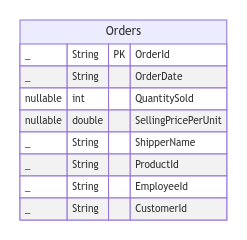

In [5]:
session.tables.schema

In [6]:
cube = session.create_cube(orders)